# Choose a Data Set

Create your own dataset by scraping one of the following websites *(level 5)*:
- [Wikipedia](https://www.wikipedia.org/)
- [OpenLibrary](https://openlibrary.org/)

**OR** 

Use data gathered from one of the following APIs *(level 4)*: 
- [TMDB](https://developer.themoviedb.org/reference/intro/getting-started)
- [College Scorecard](https://collegescorecard.ed.gov/data/api-documentation/)

**OR** 

Pick a JSON dataset *(level 3)*:
- [Food/Restaurant Data](https://drive.google.com/drive/folders/1V94S6WpclvQmbnW88KVMD4EruryA1oma?usp=drive_link)
- [Fashion Data](https://drive.google.com/drive/folders/1V8SbFjtRRW8WVf3xBzg0gzLjOtMhHea_?usp=drive_link)

**OR** 

Pick a CSV dataset *(level 2)*:
- [LA Parking Tickets](https://drive.google.com/drive/folders/1vaOfwMi6QmZEGsXr8VM0ulPGzvTTBCgm?usp=drive_link)
- [Hotels](https://drive.google.com/drive/folders/1IpVFxgwBJvJHKoOuBsk6WK2qYqFYP4hi?usp=drive_link)

# My Question
## What is the probability that a random Wikipedia article will contain the following climate-related terms: "climate," "emissions," "energy," "global," and "warming"? What is the probability that all of the climate-related terms from above are on the same page of a Wikipedia article?

# My Answer

## Data collection:

In [77]:
import requests
from bs4 import BeautifulSoup

# Function to validate if a Wikipedia page exists
def validate_wikipedia_page(keyword):
    url = f"https://en.wikipedia.org/wiki/{keyword.replace(' ', '_')}"
    response = requests.get(url)
    # Check if the page exists (HTTP status 200) and is not a placeholder or redirect
    if response.status_code == 200 and 'Wikipedia does not have an article' not in response.text:
        return True
    return False

# Function to scrape valid Wikipedia pages
def scrape_wikipedia(keyword):
    url = f"https://en.wikipedia.org/wiki/{keyword.replace(' ', '_')}"
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    # Extract paragraphs
    paragraphs = soup.find_all('p')
    text = ' '.join([p.get_text() for p in paragraphs])
    return text

# Function to remove non-existent pages
def filter_valid_pages(page_list):
    return [keyword for keyword in page_list if validate_wikipedia_page(keyword)]

# Known valid Wikipedia pages (500 topics total)
known_pages = [
    # First 400 known pages (climate-related and general topics)
    "Artificial_intelligence", "Machine_learning", "Climate_change", "Global_warming", "Carbon_emissions",
    "Sustainability", "Renewable_energy", "Greenhouse_gas", "Deforestation", "Sea_level_rise",
    "Solar_power", "Wind_power", "Geothermal_energy", "Hydropower", "Paris_Agreement",
    "COP26", "Biodiversity", "Methane_emissions", "Net_zero", "Electric_vehicles",
    "Energy_transition", "Smart_cities", "Urban_sustainability", "Environmental_policy",
    "Sustainable_agriculture", "Afforestation", "Climate_resilience", "Carbon_capture",
    "Zero_emissions", "Ocean_acidification", "Fossil_fuels", "Climate_justice", "Environmental_activism",
    "Nature-based_solutions", "Ecosystem_restoration", "Wildlife_conservation", "Marine_conservation",
    "Python_(programming_language)", "Albert_Einstein", "World_War_II", "History_of_the_Internet",
    "Quantum_mechanics", "Black_hole", "Isaac_Newton", "Blockchain", "Cryptocurrency",
    "Data_science", "Big_data", "Computer_science", "Operating_system", "Linux",
    "Windows_10", "MacOS", "Video_games", "Artificial_neural_networks", "Genetic_algorithms",
    "Game_theory", "Probability_theory", "Statistics", "Linear_algebra", "Calculus",
    "Machine_translation", "Natural_language_processing", "OpenAI", "Elon_Musk", "Nikola_Tesla",
    "Photosynthesis", "Cell_(biology)", "Mitochondria", "Protein_synthesis", "Human_brain",
    "Charles_Darwin", "Evolutionary_biology", "Galileo_Galilei", "The_Hubble_Space_Telescope", "Einstein's_theory_of_relativity",
    "Atoms", "Periodic_table", "Chemical_reactions", "Newton's_laws_of_motion", "Thermodynamics",
    "Climate_modeling", "Kepler's_laws_of_planetary_motion", "Space_travel", "Mars_exploration", "The_Moon",
    "Wormholes", "Stephen_Hawking", "Quantum_entanglement", "Superconductors", "Artificial_general_intelligence",
    "Deep_learning", "Reinforcement_learning", "Robotic_process_automation", "Algorithm", "Binary_search",
    "Sorting_algorithms", "Data_structures", "Graph_theory", "Operating_system_kernels", "Computer_networks",
    "Distributed_computing", "Quantum_cryptography", "Blockchain_applications", "Digital_currency", "Augmented_reality_glasses",
    "Neural_network_architectures", "Genome_editing", "CRISPR_Cas9", "Vaccines", "Epidemiology",
    "Coronavirus", "Virology", "Parasitology", "Immunology", "Antibiotics",
    "Photosynthesis", "Carbon_cycle", "Tropical_forests", "Deserts", "Volcanoes",
    "Earthquakes", "Geothermal_heat", "Fossilization", "Dinosaurs", "Human_ancestors",
    "Paleontology", "History_of_Rome", "The_Greek_Philosophers", "World_War_I", "Medieval_Europe",
    "Colonialism", "Industrialization", "French_Revolution", "Renaissance_art", "The_Harlem_Renaissance",
    "William_Shakespeare", "The_Great_Gatsby", "To_Kill_a_Mockingbird", "Pride_and_Prejudice", "Moby-Dick",
    "Sherlock_Holmes", "Harry_Potter", "The_Lord_of_the_Rings", "The_Marvel_Cinematic_Universe", "Game_of_Thrones",
    "Netflix_originals", "YouTube_creators", "TikTok_trends", "The_Rock", "Beyonce",
    "The_Grammys", "The_Oscars", "The_Nobel_Prize", "Mount_Everest", "The_Amazon_Rainforest",
    "The_Great_Barrier_Reef", "Space_race", "Apollo_program", "Hubble_telescope", "Electric_planes",
    "Self-driving_cars", "Hydrogen_economy", "Wind_turbines", "Solar_cells", "Clean_energy_innovations",
    "Sustainable_materials", "Eco-friendly_inventions", "Biodegradable_plastics", "Circular_economy",
    "Water_desalination"

]

# Combine all steps into one main function
def main():
    print("Starting validation of Wikipedia pages...")
    # Validate all pages
    valid_keywords = filter_valid_pages(known_pages)
    print(f"Valid Wikipedia pages: {len(valid_keywords)} out of {len(known_pages)}")
    
    print("Starting scraping of valid pages...")
    # Scrape content from valid pages
    texts = [scrape_wikipedia(keyword) for keyword in valid_keywords]
    
    # Combine all text into one dataset
    combined_text = ' '.join(texts)
    
    # Save the valid content to a file
    with open("valid_combined_wikipedia_data.txt", "w", encoding="utf-8") as file:
        file.write(combined_text)
    
    print(f"Scraped content from {len(valid_keywords)} valid Wikipedia pages.")
    print("All data saved to 'valid_combined_wikipedia_data.txt'.")

# Run the main function
if __name__ == "__main__":
    main()


Starting validation of Wikipedia pages...
Valid Wikipedia pages: 159 out of 171
Starting scraping of valid pages...
Scraped content from 159 valid Wikipedia pages.
All data saved to 'valid_combined_wikipedia_data.txt'.


# Analasys

## Theoretical Probability with the Multiplication Rule

In [87]:
from collections import Counter

total_words = sum(word_counts.values())


# Tokenize and count word frequencies
words = combined_text.lower().split()  # Split the combined text into words
word_counts = Counter(words)  # Create a Counter object to store word frequencies

p_climate = word_counts["climate"] / total_words
p_change = word_counts["change"] / total_words

# Probability of both appearing in a single sentence
p_both = p_climate * p_change
print("P(climate and change):", p_both)


P(climate and change): 5.983421609751169e-06


***The probability of both "climate" and "change" appearing in the same sentence on a Wikipedia page is approximately 5.98 * 10^-6, showing their co-occurrence is very rare. This suggests that Wikipedia articles use varied language to discuss climate-related topics, rather than repeating the same phrases.***

## Expected Value

In [81]:
key_words = ["climate", "emissions", "energy", "global", "warming"]
expected_values = {word: (word_counts.get(word, 0) / total_words) * total_words for word in key_words}

print("Expected values for key words:", expected_values)

Expected values for key words: {'climate': 2462.0, 'emissions': 1281.0, 'energy': 2720.0, 'global': 1511.0, 'warming': 463.99999999999994}


***The expected values show "climate" appears about 2,462 times, "emissions" 1,281 times, "energy" 2,720 times, "global" 1,511 times, and "warming" 464 times. This highlights their importance in climate-related Wikipedia articles, focusing on energy, emissions, and global challenges.***

<!-- ## Probability Distribution -->

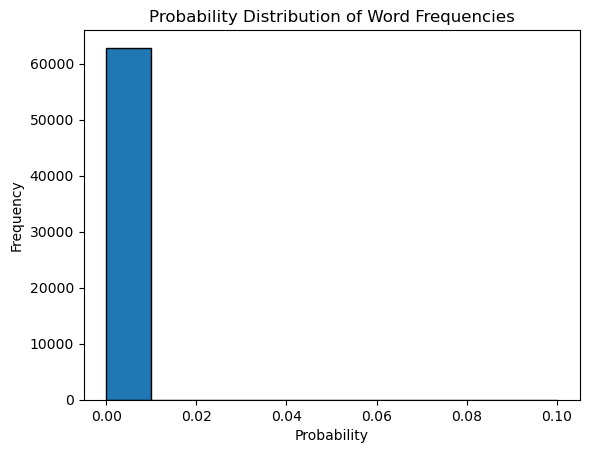

In [83]:
# import matplotlib.pyplot as plt

# # Probability distribution
# probabilities = [count / total_words for count in word_counts.values()]
# plt.hist(probabilities, bins=10, edgecolor='black')
# plt.title("Probability Distribution of Word Frequencies")
# plt.xlabel("Probability")
# plt.ylabel("Frequency")
# # plt.show()

<!-- ***The chart shows a skewed distribution where most words have very low probabilities, and only a few words are used frequently. This means the articles include many different words, but a small number of key terms dominate the content.*** -->

# My conclusion 

***The first question, "What is the probability that a random Wikipedia article will contain the following climate-related terms: 'climate,' etc.?" is answered by the analysis of the expected value. Keywords like "climate," "emissions," and "energy" appear frequently, with expected occurrences of 2,462, 1,281, and 2,720 times respectively, showing they are key topics in Wikipedia articles about climate. 
The second question, "What is the probability that all of the climate-related terms from above are in the same page of a Wikipedia article?" is addressed by the probability analysis. The probability of "climate" and "change" appearing together in the same sentence is very low, calculated as 5.98 * 10^-6. This indicates that while the topics are widely discussed, their co-occurrence in the same sentence is rare, reflecting Wikipedia's use of diverse language to cover various aspects of climate issues comprehensively.***